# 1-Dim Finite Difference Schemes for Constant Volatility

## The Pricing Partial Differential Equation

The price of a call option is a function of the time $t$ and the forward swap rate $S$: $C = C(t,S)$. If we apply Ito's lemma to $C$ we get: 
\begin{align} 
dC &= \frac{\partial C}{\partial t}dt + \frac{\partial C}{\partial S}dS + \frac{1}{2} \frac{\partial^2 C}{\partial S^2}dS^2\\ 
& = \left( \frac{\partial C}{\partial t}+\frac{\sigma^2}{2} \frac{\partial^2 C}{\partial S^2}\right)dt + \sigma\frac{\partial C}{\partial S}dW
\end{align} 
Since the call option is a tradeable asset, it must be a (local) martingale, which means the drift term is zero, and this yields the pricing PDE 
$$\frac{\partial C}{\partial t}=-\frac{\sigma^2}{2} \frac{\partial^2 C}{\partial S^2}$$
If $\tau = T-t$ is the time to maturity, then the PDE becomes
$$\frac{\partial C}{\partial \tau}=\frac{\sigma^2}{2} \frac{\partial^2 C}{\partial S^2}$$
The initial condition is $max(S-K,0)$. 

The boundary conditions are 
\begin{cases}
\lim_{S\rightarrow - \infty}C(t,S)=0&\\
\lim_{S\rightarrow \infty}\frac{\partial C}{\partial S}= 1&
\end{cases}

Overall, the PDE together with its initial and boundary conditions is: 

\begin{cases}
\frac{\partial C}{\partial \tau}& =\frac{\sigma^2}{2} \frac{\partial^2 C}{\partial S^2}\\
C(0,S) & = \mbox{max}(S-K,0)\\
\lim_{S\rightarrow - \infty}C(\tau,S)&=0\\
\lim_{S\rightarrow \infty}\frac{\partial C}{\partial S}&= 1
\end{cases}


Finite Difference Schemes
-------------------------
When we set up a finite difference scheme we discretize the time and space and we replace the equation that involves continuous derivatives with one that involves differences between the value of the solution at the grid points. 

The grid points involved in one such finite difference are called the "stencil". 

Let's start with the derivation of the explicit finite difference scheme. The stencil is shown below: 

\begin{align}
u_{i,j+1}&\\
| &\quad\backslash\\
| &\quad\quad\backslash\\
u_{i,j}&--u_{i+1,j}\\
| &\quad \quad / \\
| &\quad / \\
u_{i,j-1}&
\end{align}

where $u_{i,j}=\tilde{C}(\tau_i, S_j)$.

In order to approximate the PDE by a finite differece, we use 

\begin{align}
    \frac{\partial u}{\partial t} & \approx \frac{u_{i+1,j}-u_{i,j}}{d\tau}\\
    \frac{\partial^2 u}{\partial S^2} & \approx \frac{u_{i,j+1}-2u_{i,j}+u_{i,j-1}}{dS^2}
\end{align}

The PDE $\frac{\partial u}{\partial \tau} =\frac{\sigma^2}{2} \frac{\partial^2 u}{\partial S^2}$ becomes:

$$\frac{u_{i+1,j}-u_{i,j}}{d\tau}=\frac{\sigma^2}{2}\frac{u_{i,j+1}-2u_{i,j}+u_{i,j-1}}{dS^2}$$

We denote by $h=\frac{\sigma^2d\tau}{2dS^2}$ and we get

$$ u_{i+1,j} = h u_{i,j+1} +(1-2 h) u_{i,j} + h u_{i,j-1}$$


Mathematically we can write this in matrix form with $\theta =1$

$$ u_{i+1,j} = u_{i,j}+d\tau \frac{\sigma^2}{2 dS^2} (  u_{i,j+1} -2 u_{i,j} + u_{i,j-1}) $$

$$ u_{i+1,} = (I + h \mathcal{D})  u_{i,}, h = \frac{\sigma^2d\tau}{2 dS^2}  $$

Where $\mathcal{D}$ is tridiagonal matrix of the form:

$$
\left(
\begin{array}{c}
U^{n+1}_{1} \\
U^{n+1}_{2} \\
\vdots \\
U^{n+1}_{M-2} \\
U^{n+1}_{M-1} \\
\end{array}
\right) =\left( \left(\begin{array}{ccccc}
1  & 0 & 0 & \cdots  & 0 \\
0 & 1  & 0& 0  & 0  \\
0      & \ddots & \ddots &   \ddots     & 0  \\
\vdots & 0 & 0 & 1 & 0 \\
0      & 0 & 0 & 0 &1\\
\end{array}\right)+
\underbrace{
h\left(
\begin{array}{ccccc}
-2   & 1 & 0 & \cdots  & 0 \\
1   & -2  & 1& 0  & 0  \\
0      & \ddots & \ddots &   \ddots     & 0  \\
\vdots & 0 & 1 & -2  & 1 \\
0      & 0 & 0 & 1  & -2 \\
\end{array}
\right) }_{\mathcal{D}}\right) \cdot
\left(
\begin{array}{c}
U^{n}_{1} \\
U^{n}_{2} \\
\vdots \\
U^{n}_{M-2} \\
U^{n}_{M-1} 
\end{array}
\right)
+ \underbrace{
\left(
\begin{array}{c}
 a U^{n}_{0} \\
  0 \\
 \vdots \\
 0 \\
c U^{n}_{M} \\
\end{array}
\right) }_{\mbox{B (boundary terms)}}
$$

In the same terms we can write the implicit method as:
$$ (I - h \mathcal{D}) u_{i+1,} =  u_{i,} $$

with the solution:

$$  u_{i+1,} = \left(I - h \mathcal{D}\right)^{-1} u_{i,} $$


$$
\left(
\begin{array}{c}
U^{n+1}_{1} \\
U^{n+1}_{2} \\
\vdots \\
U^{n+1}_{M-2} \\
U^{n+1}_{M-1} \\
\end{array}
\right) =\left( \left(\begin{array}{ccccc}
1  & 0 & 0 & \cdots  & 0 \\
0 & 1  & 0& 0  & 0  \\
0      & \ddots & \ddots &   \ddots     & 0  \\
\vdots & 0 & 0 & 1 & 0 \\
0      & 0 & 0 & 0 &1\\
\end{array}\right)-
\underbrace{
h\left(
\begin{array}{ccccc}
-2   & 1 & 0 & \cdots  & 0 \\
1   & -2  & 1& 0  & 0  \\
0      & \ddots & \ddots &   \ddots     & 0  \\
\vdots & 0 & 1 & -2  & 1 \\
0      & 0 & 0 & 1  & -2 \\
\end{array}
\right) }_{\mathcal{D}}\right)^{-1} \cdot
\left(
\begin{array}{c}
U^{n}_{1} \\
U^{n}_{2} \\
\vdots \\
U^{n}_{M-2} \\
U^{n}_{M-1} 
\end{array}
\right)
+ \underbrace{
\left(
\begin{array}{c}
 a U^{n}_{0} \\
  0 \\
 \vdots \\
 0 \\
c U^{n}_{M} \\
\end{array}
\right) }_{\mbox{B (boundary terms)}}
$$

The Crank Nicolson can be viewed as half implicit half explicit scheme with $\theta =1/2$


$$  u_{i+1,} = \left(I - (1-\theta) h \mathcal{D}\right)^{-1} (I + \theta h \mathcal{D})  u_{i,} $$

As for the boundary conditions, we will implement a modified version of them. If we take enough grid points so the probability of the log stock to hit the boundary is negligible, we can say that the option value on the boundary is pretty much anything we want. However, we should put some reasonable values at the boundaries, for two reasons: 1. if we put huge values, we may have a multiplication between a huge value and a small probability, and the result will be unstable, and 2. if we put reasonable values we may get away with a smaller range for the finite difference scheme, thus getting some speedup. A good choice of the boundary condition is that the function value at the boundary is constant, so we have 

\begin{align}
u_{i+1,0} & = u_{i,0}\\
u_{i+1,N} & = u_{i,N}
\end{align}

Now, onto the small details of the finite difference implementation. We will center our grids at the initial value of the forward swap rate, let's call it $S$. The grid will cover the area $[0,T]\times [S-n\sigma\sqrt(T), S+n\sigma\sqrt(T)]$, where $n$ is a value large enough so that the arithmetic Brownian Motion $\sigma dW$ does not cross the boundary with any significant probability. A good value for $n$ is 7. We then need to specify the number of points on the time axis and on the space axis. 

In [1]:
from IPython.display import HTML
HTML('''<script> code_show=true; 
function code_toggle(){if(code_show){$('div.input').hide();}else{$('div.input').show();}
code_show = !code_show} $( document ).ready(code_toggle);</script>
<a href="javascript:code_toggle()">Toggle code cells</a>.''')
%matplotlib inline

In [34]:
import sys
sys.path.append('/Users/cristiangpasarica/Documents/StochasticProcess/Financial-Models-Numerical-Methods-master/IPython Notebooks')
import numpy as np
from scipy.stats import norm
import numpy as np
from numpy import linalg
from scipy.stats import norm

def Black(S=100,K=100,sigma=.3,T=1, voltype='Normal'):
    """Return price of swaption in Black model
    
    Inputs:
    S = spot (current value of forward swap rate)
    K = strike
    sigma = volatility (in normal or lognormal units)
    T = expiry
    voltype = one of 'Normal' or 'Lognormal' """
    if voltype=='Normal':
        moneyness = S-K
        atMaturityStdev = sigma*np.sqrt(T)
        scaledMoneyness = moneyness/atMaturityStdev
        return (moneyness * norm.cdf(scaledMoneyness)+atMaturityStdev * norm.pdf(scaledMoneyness))
    elif voltype=='Lognormal':
        d1 = (np.log(1.0*S/K)+0.5*sigma**2*T)/(sigma*np.sqrt(T))
        d2 = d1 - sigma*np.sqrt(T)
        return S*norm.cdf(d1)-K*norm.cdf(d2)    
    else:
        raise Exception("Unsupported option volatility type, should be 'Normal' or 'Lognormal', '" + voltype + "' entered."  )
        
from scipy.optimize import newton
def impliedVol(Opt_price, S,K,T, vol_guess = 0.01, voltype = 'Normal'):
    return newton(func = lambda sigma:Black(S, K, sigma,T,voltype)-Opt_price,
                  x0 = vol_guess,
                  tol = 1e-9)

print (Black(100,100,.2,1))


0.07978845608028655


In [87]:
def FD(S,K,sigma,T,nbTs=50, nbSs=100,nbSigmas=7, type="Crank-Nicolson"):

    ''' Implement and solve a finite difference scheme.
    
    Arguments: 
    S = spot (initial value of forward swap rate)
    K = strike
    sigma = volatility (normal)
    T = option expiry in years
    nbTs = number time points in grid
    nbSs = number spot points in grid
    nbSigmas = grid cover nbSigmas*sigma*sqrt(T) both above and below S
    type = one of ['Explicit', 'Implicit', 'Crank-Nicolson', 'ADE', 'Richardson-Implicit']
    
    Returns a dictionary with the keywords: 
    OptPrice = Option price
    SpotGrid = Spot grid points
    CallGrid = call grid points
    transMatrix= the transition matrix 
    condNumber = condition number = sigma**2 * dt/(2*ds**2)
    '''
    if nbSs%2==1:
        nbSs += 1
    N = nbSs
    ds = 2*nbSigmas*sigma*np.sqrt(T)/(N-1)
    dt = 1.0*T/(nbTs-1)
    Ss = np.array(range(nbSs))*ds -(N-1)/2*ds+S
    payoff = np.maximum(Ss-K,0)
    h = sigma**2 * dt/(2*ds**2)
    if type=='Explicit':
        M = np.zeros((N,N))
        M[0,0]=1; M[N-1,N-1]=1 # boundary conditions
        for i in range(1,N-1):
            M[i,i+1]=h
            M[i,i]=1-2*h
            M[i,i-1]=h
    elif type=='Implicit':
        A = np.zeros((N,N))
        A[0,0]=1; A[N-1,N-1]=1 # boundary conditions
        for i in range(1,N-1):
            A[i,i+1]=-h
            A[i,i]=1+2*h
            A[i,i-1]=-h
        M = linalg.inv(A)
    elif type=='Crank-Nicolson':
        A = np.zeros((N,N))
        A[0,0]=1; A[N-1,N-1]=1
        for i in range(1,N-1):
            A[i,i+1]=-h/2
            A[i,i]=1+h
            A[i,i-1]=-h/2
        B = np.zeros((N,N))
        B[0,0]=1; B[N-1,N-1]=1
        for i in range(1,N-1):
            B[i,i+1]=h/2
            B[i,i]=1-h
            B[i,i-1]=h/2
        M = np.dot(linalg.inv(A),B)
    elif type=='ADE':
        A = np.zeros((N,N))
        A[0,0]=1; A[N-1,N-1]=1
        for i in range(1,N-1):
            A[i,i+1]=h/(1+h)
            A[i,i]=(1-h)/(1+h)
            A[i]+= A[i-1]*h/(1+h)
        B = np.zeros((N,N))
        B[0,0]=1; B[N-1,N-1]=1
        for i in range(1,N-1)[::-1]:
            B[i,i-1]=h/(1+h)
            B[i,i]=(1-h)/(1+h)
            B[i]+= B[i+1]*h/(1+h)
        M = (A+B)/2
    elif type=='Richardson-Implicit':
        A = np.zeros((N,N))
        A[0,0]=1; A[N-1,N-1]=1 # boundary conditions
        for i in range(1,N-1):
            A[i,i+1]=-h
            A[i,i]=1+2*h
            A[i,i-1]=-h
        B = np.zeros((N,N))
        B[0,0]=1; B[N-1,N-1]=1 # boundary conditions
        for i in range(1,N-1):
            B[i,i+1]=-h/2
            B[i,i]=1+h
            B[i,i-1]=-h/2
        A_inv = linalg.inv(A)
        B_inv = linalg.inv(B)
        M = 2*np.dot(B_inv,B_inv)-A_inv
    Cs = np.maximum(Ss-K,0) #Call option values at expiry
    for j in range(nbTs-1)[::-1]:
        Cs = np.dot(M,Cs)
    OptPrice = Cs[int((N-1)/2)]
    return dict(OptPrice=OptPrice, SpotGrid=Ss, CallGrid=Cs, transMatrix=M, condNumber=h)

S = 100; K = 100; sigma = 0.2; T = 1
nbTs=100; nbSs = 100
print (FD(S, K, sigma, T , nbTs, nbSs, type='Explicit'))

{'OptPrice': 0.07301750091345367, 'SpotGrid': array([ 98.6       ,  98.62828283,  98.65656566,  98.68484848,
        98.71313131,  98.74141414,  98.76969697,  98.7979798 ,
        98.82626263,  98.85454545,  98.88282828,  98.91111111,
        98.93939394,  98.96767677,  98.9959596 ,  99.02424242,
        99.05252525,  99.08080808,  99.10909091,  99.13737374,
        99.16565657,  99.19393939,  99.22222222,  99.25050505,
        99.27878788,  99.30707071,  99.33535354,  99.36363636,
        99.39191919,  99.42020202,  99.44848485,  99.47676768,
        99.50505051,  99.53333333,  99.56161616,  99.58989899,
        99.61818182,  99.64646465,  99.67474747,  99.7030303 ,
        99.73131313,  99.75959596,  99.78787879,  99.81616162,
        99.84444444,  99.87272727,  99.9010101 ,  99.92929293,
        99.95757576,  99.98585859, 100.01414141, 100.04242424,
       100.07070707, 100.0989899 , 100.12727273, 100.15555556,
       100.18383838, 100.21212121, 100.24040404, 100.26868687,
       10

Let's look at the errors of the FD schemes that we implemented. We'll start with a choice of parameters so that the explicit scheme is stable. 

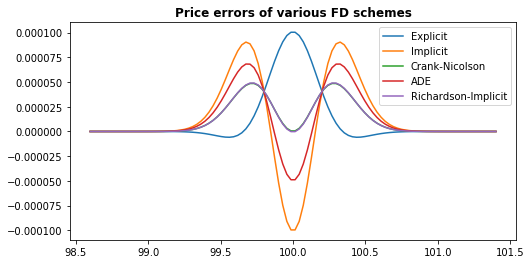

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,4))
ax.set_title('Price errors of various FD schemes',fontweight="bold")
fds={}
S = 100; K = 100; sigma = 0.2; T = 1
nbTs=100; nbSs = 100
for type in ['Explicit', 'Implicit', 'Crank-Nicolson', 'ADE', 'Richardson-Implicit']:
    fds[type]=FD(S, K, sigma, T , nbTs, nbSs, type=type)
    Ss = fds[type]['SpotGrid']
    Cs = fds[type]['CallGrid']
    actuals = Black(Ss, K, sigma, T)
    
    errors = Cs-actuals
    ax.plot(Ss, errors, label=type)
ax.legend();

In [39]:
Cs[50]

6.58588238374358e-09

In [30]:
Ss[50]

100.00141414141414

In [31]:
actuals[50]

0.008705853088460072

In [28]:
Ss

array([ 99.86      ,  99.86282828,  99.86565657,  99.86848485,
        99.87131313,  99.87414141,  99.8769697 ,  99.87979798,
        99.88262626,  99.88545455,  99.88828283,  99.89111111,
        99.89393939,  99.89676768,  99.89959596,  99.90242424,
        99.90525253,  99.90808081,  99.91090909,  99.91373737,
        99.91656566,  99.91939394,  99.92222222,  99.92505051,
        99.92787879,  99.93070707,  99.93353535,  99.93636364,
        99.93919192,  99.9420202 ,  99.94484848,  99.94767677,
        99.95050505,  99.95333333,  99.95616162,  99.9589899 ,
        99.96181818,  99.96464646,  99.96747475,  99.97030303,
        99.97313131,  99.9759596 ,  99.97878788,  99.98161616,
        99.98444444,  99.98727273,  99.99010101,  99.99292929,
        99.99575758,  99.99858586, 100.00141414, 100.00424242,
       100.00707071, 100.00989899, 100.01272727, 100.01555556,
       100.01838384, 100.02121212, 100.0240404 , 100.02686869,
       100.02969697, 100.03252525, 100.03535354, 100.03

We know however that the explicit scheme can be unstable. Here's an example. Going forward we'll compare all the schemes except for the explicit one. 

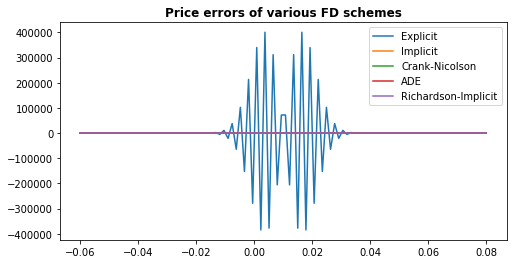

In [8]:
fig, ax = plt.subplots(figsize=(8,4))
ax.set_title('Price errors of various FD schemes',fontweight="bold")
fds={}
S = 0.01; K = 0.01; sigma = 0.01; T = 1
nbTs=30; nbSs = 100
for type in ['Explicit', 'Implicit', 'Crank-Nicolson', 'ADE', 'Richardson-Implicit']:
    fds[type]=FD(S, K, sigma, T , nbTs, nbSs, type=type)
    Ss = fds[type]['SpotGrid']
    Cs = fds[type]['CallGrid']
    actuals = Black(Ss, K, sigma, T)
    errors = Cs-actuals
    ax.plot(Ss,errors, label=type)
ax.legend();

Let's look again at the comparison, removing the explicit method

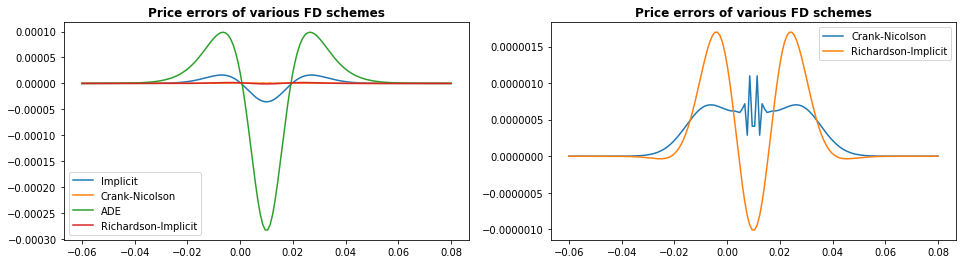

In [9]:
fig, ax = plt.subplots(figsize=(16,4),ncols=2)
ax[0].set_title('Price errors of various FD schemes',fontweight="bold")
ax[1].set_title('Price errors of various FD schemes',fontweight="bold")
fds={}
S = 0.01; K = 0.01; sigma = 0.01; T = 1
nbTs=15; nbSs = 150
for type in ['Implicit', 'Crank-Nicolson', 'ADE', 'Richardson-Implicit']:
    fds[type]=FD(S, K, sigma, T , nbTs, nbSs, type=type)
    Ss = fds[type]['SpotGrid']
    Cs = fds[type]['CallGrid']
    actuals = Black(Ss, K, sigma, T)
    errors = Cs-actuals
    ax[0].plot(Ss,errors, label=type)
    if type in ['Crank-Nicolson','Richardson-Implicit']:
        ax[1].plot(Ss,errors, label=type)
ax[0].legend();ax[1].legend();

Let's see now how fast these schemes are

In [12]:
%%capture times
fdtypes = ['Explicit','Implicit', 'Crank-Nicolson', 'ADE', 'Richardson-Implicit']
for t in fdtypes:
    print (t + ' '*(25-len(t))+':')
    %timeit FD(S, K, sigma, T , nbTs, nbSs, type=t)
fd = FD(S, K, sigma, T , nbTs, nbSs, type='Explicit')
Ss = fd['SpotGrid']
print ('Black 1 value            :')
%timeit Black(S, K, sigma, T)
print ('Black 1 slice            :')
%timeit Black(Ss, K, sigma, T)

In [11]:
rs = times._stdout.getvalue().split('\n')
for case, timing in zip(rs[::2],rs[1::2]):
    print (case, '\t'.join(timing.split()[0:2]))

Explicit                 : 219	us
Implicit                 : 472	us
Crank-Nicolson           : 799	us
ADE                      : 2.21	ms
Richardson-Implicit      : 1.07	ms
Black 1 value            : 157	us
Black 1 slice            : 177	us


We note here that our implementation of these schemes is not optimal. For the explicit and ADE case we calculate the full transition matrix, and we multiply by it; in the explicit case most of our multiplications will be by zero, which is inefficient. In the ADE case, a simple loop will achieve a lot of computation reuse, which is lost using a matrix-based code. For the other 3 cases, we perform a matrix inversion when solving a linear system will do. Depending on how many time slices we have it may be more efficient to calulate once the inverse matrix and then do a matrix multiplication, but if the number of time slices is small compared to the number of points in the space dimension it may be better to solve each system separately. We didn't do this type of analysis, and this could achieve substantial time savings. 

Let's now look at how the instability arises for the explicit scheme. The interactive plot below is centered at some parameter values where the explicit scheme starts being unstable, but only barely. 

In [35]:
def fn(nbTs=119, nbSs=152):
    S = 0.01; K = 0.01
    sigma = 0.01; T = 1
    fig, ax = plt.subplots(figsize=(8,4))
    ax.set_title('Price errors of various FD schemes',fontweight="bold")
    fds={}
    for type in ['Explicit', 'Implicit', 'Crank-Nicolson', 'ADE', 'Richardson-Implicit']:
        fds[type]=FD(S, K, sigma, T , nbTs, nbSs, type=type)
        Ss = fds[type]['SpotGrid']
        Cs = fds[type]['CallGrid']
        actuals = Black(Ss, K, sigma, T)
        errors = Cs-actuals
        ax.plot(Ss,errors, label=type)
    ax.legend();
    print ('Condition number is :', fds['Explicit']['condNumber'])
    plt.show();
from IPython.html.widgets import interact
from IPython.display import clear_output, display, HTML 
interact(fn, nbTs=(110,130,1),nbSs=(140,160,1))

/Users/cristiangpasarica/opt/anaconda3/lib/python3.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


interactive(children=(IntSlider(value=119, description='nbTs', max=130, min=110), IntSlider(value=152, descrip…

<function __main__.fn(nbTs=119, nbSs=152)>

In [40]:
S0=100.0    # spot stock price
K=100.0     # strike
T=1.0       # maturity 
r=0.05       # risk free rate 
sig=0.2     # diffusion coefficient or volatility

def BlackScholes(S,K,r,T,sigma, voltype='Normal', option = 'call'):
    """Return price of swaption in BlackScholes model
    
    Inputs:
    S = spot (current value of forward swap rate)
    K = strike
    sigma = volatility (in normal or lognormal units)
    T = expiry
    r = interest rates
    voltype = one of 'Normal' or 'Lognormal' """
    if voltype=='Normal':
        moneyness = S-K
        atMaturityStdev = sigma*np.sqrt(T)
        scaledMoneyness = moneyness/atMaturityStdev
        return (moneyness * norm.cdf(scaledMoneyness)+atMaturityStdev * norm.pdf(scaledMoneyness))
    elif voltype=='Lognormal':
        d1 = (np.log(1.0*S/K)+(r+sigma**2/2.0)*T)/(sigma*np.sqrt(T))
        d2 = d1 - sigma*np.sqrt(T)
        if  option == 'call':
            return S*norm.cdf(d1)-K*np.exp(-r*T)*norm.cdf(d2) 
        else:
            return (K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1))
    else:
        raise Exception("Unsupported option volatility type, should be 'Normal' or 'Lognormal', '" + voltype + "' entered."  )
        
print("BS Formula Price: ", BlackScholes(S0,K,r,T, sig, voltype='Lognormal'))

call = BlackScholes(S0,K,r,T, sig, voltype='Lognormal')
put = BlackScholes(S0,K,r,T, sig, 'Lognormal' , "put")
print('call:',call) 
print('pul:',put) 

print('call-put', call - put , 'S0 - K * np.exp(-r*T):', S0 - K * np.exp(-r*T) )

from scipy.optimize import newton
def impliedVol(Opt_price, S0,K,r,T, vol_guess = sig, voltype = 'Lognormal'):
    return newton(func = lambda sigma:BlackScholes(S0,K,r,T, sigma, voltype='Lognormal')-Opt_price,
                  x0 = vol_guess,
                  tol = 1e-8)
price = BlackScholes(S0,K,r,T, sig, voltype='Lognormal')
print ("impliedVol" , impliedVol(price, S0,K,r,T, vol_guess = 0.11, voltype = 'Lognormal'))

BS Formula Price:  10.450583572185565
call: 10.450583572185565
pul: 5.573526022256971
call-put 4.877057549928594 S0 - K * np.exp(-r*T): 4.877057549928594
impliedVol 0.20000000000000007
